# Download and Unzip Dataset


In [ ]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1airCvlhgn8sG8PbXG0SowKdRqqg6heGX"
output = "Lung Dataset.zip"
gdown.download(url, output, quiet=False)

In [ ]:
import zipfile
import os

zip_path = '/content/Lung Dataset.zip'
extract_path = '/content'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

# Split Dataset

In [ ]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from numpy import expand_dims
from datetime import datetime
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def split_dataset(dataset_dir, output_dir, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2):
    """
    Membagi dataset menjadi train, val, dan test.

    Parameters:
    - dataset_dir: Direktori input dataset.
    - output_dir: Direktori output untuk hasil pembagian dataset.
    - train_ratio: Persentase data untuk training.
    - val_ratio: Persentase data untuk validation.
    - test_ratio: Persentase data untuk testing.
    """
    # Membuat folder train, val, dan test di output directory.
    os.makedirs(os.path.join(output_dir, "train"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "val"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "test"), exist_ok=True)

    # Mendapatkan daftar kelas
    classes = os.listdir(dataset_dir)

    # Loop melalui setiap kelas
    for cls in classes:
        cls_folder = os.path.join(dataset_dir, cls)
        if not os.path.isdir(cls_folder):
            continue

        # Membuat folder kelas di train, val, dan test
        os.makedirs(os.path.join(output_dir, "train", cls), exist_ok=True)
        os.makedirs(os.path.join(output_dir, "val", cls), exist_ok=True)
        os.makedirs(os.path.join(output_dir, "test", cls), exist_ok=True)

        # Mendapatkan daftar file gambar dan mengacak urutannya
        images = os.listdir(cls_folder)
        random.shuffle(images)

        # Menghitung jumlah data untuk train, val, dan test
        train_count = int(train_ratio * len(images))
        val_count = int(val_ratio * len(images))
        test_count = len(images) - train_count - val_count

        # Memindahkan file ke folder train
        for i in range(train_count):
            src = os.path.join(cls_folder, images[i])
            dst = os.path.join(output_dir, "train", cls, images[i])
            shutil.copy2(src, dst)

        # Memindahkan file ke folder val
        for i in range(train_count, train_count + val_count):
            src = os.path.join(cls_folder, images[i])
            dst = os.path.join(output_dir, "val", cls, images[i])
            shutil.copy2(src, dst)

        # Memindahkan file ke folder test
        for i in range(train_count + val_count, len(images)):
            src = os.path.join(cls_folder, images[i])
            dst = os.path.join(output_dir, "test", cls, images[i])
            shutil.copy2(src, dst)

    print("Dataset berhasil dibagi menjadi train, val, dan test.")
file_from="/content/Lung Dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"
file_to ="DataSet"
split_dataset(file_from,file_to)


# Dataset Directories Configuration

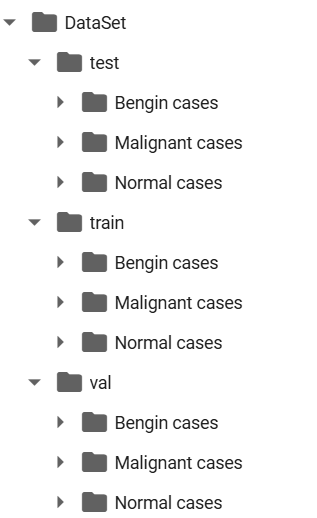

#1. Steps for Lung Cancer Image Classification Using CNN


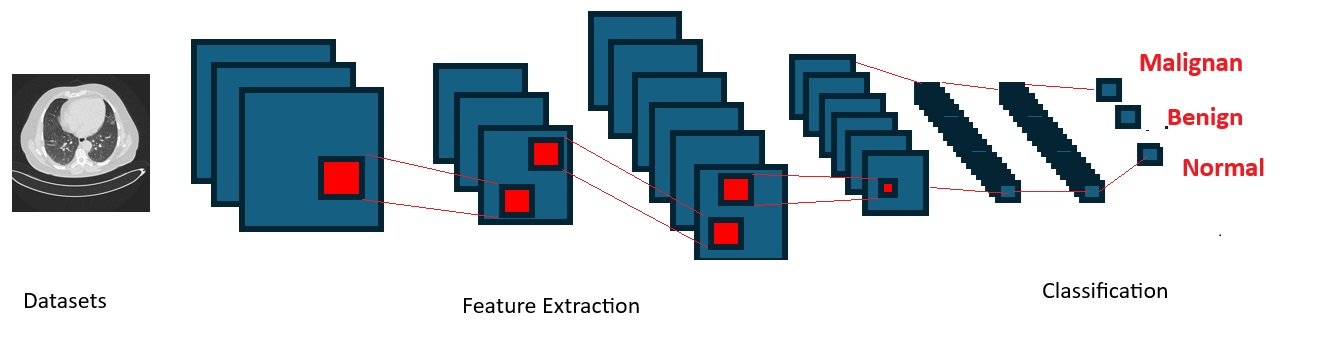

## **1. Libraries  for Lung Cancer Image Classification**

This section imports the necessary libraries for image processing, building the CNN model, performance evaluation, and visualization of the lung cancer classification results.









In [ ]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from numpy import expand_dims
from datetime import datetime



### `load_data` Function Explanation

1. **Purpose**:
   - Loads training, validation, and test data from specified directories using `ImageDataGenerator` for image preprocessing (rescaling).

2. **Parameters**:
   - `train_dir`: Directory containing the training images.
   - `val_dir`: Directory containing the validation images.
   - `test_dir`: Directory containing the test images.
   - `batch_size`: Number of images processed in a batch (default is 32).

3. **Process**:
   1. Initializes three `ImageDataGenerator` instances for training, validation, and test data with rescaling.
   2. Loads the data from the directories using `flow_from_directory`.
   3. Ensures no shuffling for the test data.

4. **Returns**:
   - Three data generators: `data_train`, `data_val`, `data_test` for training, validation, and testing.

5. **Checks**:
   1. Verifies that the data generators are correctly initialized and not `None`.
   2. Prints the number of classes and samples in each dataset to ensure consistency.


In [ ]:
def load_data(train_dir, val_dir, test_dir, batch_size=32):
    """
    Loads training, validation, and test data from directories using ImageDataGenerator.

    Parameters:
    - train_dir: Directory containing training data.
    - val_dir: Directory containing validation data.
    - test_dir: Directory containing test data.
    - batch_size: The number of images to process in a batch (default is 32).

    Returns:
    - data_train: Training data generator.
    - data_val: Validation data generator.
    - data_test: Test data generator.
    """
    target_size = (224, 224)

    # Initialize the ImageDataGenerators with rescaling
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Load the data from directories
    data_train = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    print(f"Data Train: {data_train}")

    data_val = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    print(f"Data Val: {data_val}")

    data_test = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # Ensure no shuffling in test data
    )
    print(f"Data Test: {data_test}")

    # Additional checks to ensure data was loaded correctly
    if data_train is None or data_val is None or data_test is None:
        raise ValueError("One or more data generators failed to load. Please check the directories.")

    # Print the number of classes in each data set to ensure they match
    print(f"Number of classes in train data: {data_train.num_classes}")
    print(f"Number of classes in validation data: {data_val.num_classes}")
    print(f"Number of classes in test data: {data_test.num_classes}")

    # Verify that the number of samples in each dataset is consistent
    print(f"Number of training samples: {data_train.samples}")
    print(f"Number of validation samples: {data_val.samples}")
    print(f"Number of test samples: {data_test.samples}")

    return data_train, data_val, data_test



train_dir = "/content/DataSet/train"
val_dir= "/content/DataSet/val"
test_dir= "/content/DataSet/test"
data_train, data_val, data_test = load_data(train_dir,val_dir,test_dir)

## **3. CNN Model**

The CNN architecture is designed with the following layers:

- **Convolutional Layer**: Extracts features using convolution operations.
- **Activation Layer**: The ReLU activation function is applied to introduce non-linearity.
- **Pooling Layer**: Reduces the feature dimensions using max-pooling.
- **Fully Connected Layer**: Connects the extracted features to the classification layer.
- **Output Layer**: Uses a softmax activation function for multi-class classification.


In [ ]:
def CNNModel(input_shape=(224, 224, 3), num_classes=3):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=input_img, outputs=x)
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
cnn_model=CNNModel()


### Code Explanation

#### 1. Input Layer
```python
input_img = Input(shape=(224, 224, 3))
```
- Creates an input layer with the size **(224, 224, 3)**.
- **224 x 224**: Image dimensions (height and width).
- **3**: Color channels (RGB).

#### 2. First Convolutional Layer
```python
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
```
- Convolutional layer with **32 filters** of size **(3, 3)**.
- Activation function is **ReLU (Rectified Linear Unit)**.
- **Padding='same'**: Produces an output with the same dimensions as the input.
- This layer is responsible for extracting features from the image.

#### 3. First Pooling Layer
```python
x = MaxPooling2D((2, 2), padding='same')(x)
```
- **MaxPooling** layer with a size of **(2, 2)**.
- Takes the maximum value from every **2x2** pixel block, reducing the feature size by half.
- **Padding='same'**: Maintains the output size to avoid drastic size reduction.

#### 4. Second Convolution and Pooling Layers
```python
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
```
- The second convolution and pooling process with the same parameters as before.
- Repeats the feature extraction process, increasing the depth of the network.

#### 5.  Third Convolutional Layer
```python
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
```
- Third convolutional layer with 32 filters and 'same' padding.
- Further feature extraction to enhance the complexity of detected features.

#### 6. Flatten Layer
```python
x = Flatten()(x)
```
- Converts the 2D feature maps (matrices) into a **1D** vector.
- This is required to connect the convolution output to the Dense layer.

#### 7. First Dense Layer
```python
x = Dense(64, activation='relu')(x)
```
- A fully connected layer with **64 neurons** and **ReLU** activation.
- Learns more complex patterns from the extracted features.

#### 8.  Second Dense Layer
```python
x = Dense(32, activation='relu')(x)
```
- A second fully connected layer with **32 neurons** and **ReLU** activation.
- Further refines features in preparation for classification.

#### 9. Output Layer
```python
x = Dense(num_classes, activation='softmax')(x)
```
- Output layer with a number of neurons equal to **num_classes** (number of classes).
- **Softmax** activation is used to produce class probabilities.
- The model predicts the class with the highest probability.

#### 10.  Model Definition
```python
cnn_model = Model(input_img, x)
```
- Defines the model with **input_img** as input and **x** as output.
- The model is now ready to be trained for image classification tasks.


### Code Explanation:
'''python
`cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])`
'''


This code configures the model before training begins. Below is the explanation for each parameter:

1. **`loss='categorical_crossentropy'`**:
   - The **loss** function calculates the error between the model's predictions and the true labels in multi-class classification using *one-hot encoding*.
   - The formula for **categorical cross-entropy** is:

   \begin{equation}
   L = -\sum_{i=1}^{C} y_i \cdot \log(\hat{y}_i)
   \end{equation}

   where:
   - $ C $: the number of classes,
   - $ y_i $: the true label (0 or 1 in one-hot encoding),
   - $ \hat{y}_i $: the predicted probability for class $ i $.

2. **`optimizer='adam'`**:
   - The **optimizer** updates the model's weights during training. `adam` is an adaptive optimizer that combines *AdaGrad* and *RMSProp*
   - The Adam algorithm updates the weights using the following formulas:

   \begin{equation}
   m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
   \end{equation}

   \begin{equation}
   v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
   \end{equation}

   where:
   - $ m_t $ and $ v_t $ are the first and second moment estimates of the gradients,
   - $ g_t $ is the current gradient,
   - $ \beta_1 $ and $ \beta_2 $ are smoothing constants.

3. **`metrics=['accuracy']`**:
   - The **metrics** are used to evaluate the model's performance during training and testing. `accuracy` measures how often the model's predictions match the true labels.
   - The formula for **accuracy** is:

   \begin{equation}
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
   \end{equation}

Overall, this code configures the model with:
- **Loss function**: `categorical_crossentropy` for multi-class classification.
- **Optimizer**: `adam` for updating the model's weights.
- **Metrics**: `accuracy` for evaluating the model's performance.


### 4. `TrainModel` Function Explanation

1. **Purpose**:
   - Trains a CNN model using the provided training and validation data generators, and saves the trained model weights.

2. **Parameters**:
   - `train_generator`: Data generator for the training dataset.
   - `validation_generator`: Data generator for the validation dataset.
   - `epochs`: The number of epochs to train the model.
   - `input_shape`: Shape of the input image (default is `(224, 224, 3)`).
   - `model_weights`: Path where the model weights will be saved (default is `'weights.h5'`).
   - `batch_size`: Number of samples per batch (default is 32).

3. **Process**:
   1. Initializes a CNN model with the specified input shape and number of classes.
   2. Calculates the number of steps per epoch for training and validation based on the size of the datasets.
   3. Trains the model using the `fit` method with the training and validation data generators.
   4. Saves the trained model weights to the specified file.
   
4. **Training and Validation**:
   - The model is trained for the specified number of epochs with training data and validated on the validation data.

5. **History Plot**:
   1. Plots the training and validation accuracy over the epochs.
   2. Plots the training and validation loss over the epochs.

6. **Returns**:
   - The trained CNN model.



In [ ]:
import matplotlib.pyplot as plt

def TrainModel(train_generator, validation_generator, epoch=10, input_shape=(224,224,3), model_weights='weights.h5', batch_size=32):
    # Initialize the model
    model = CNNModel(input_shape=input_shape, num_classes=train_generator.num_classes)

    # Train the model
    history = model.fit(
        train_generator,  # Use the correct variable name for training data
        validation_data=validation_generator,  # Use the correct variable name for validation data
        epochs=epoch,  # Number of epochs
        batch_size=batch_size
    )

    # Save the model weights
    model.save(model_weights)

    # Plot the training history (Accuracy & Loss)
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    return model

# Example usage:
TrainModel(train_generator=data_train, validation_generator=data_val, epoch=10)


## **5. Predict Images**
### `predict_images_from_dir`
This function is  for predicting the classes of images in a specific directory, particularly when the images are not labeled and class labels need to be assigned based on the model’s predictions.

- **Load a pre-trained model**:
   - The function loads a pre-trained model from a specified file for making predictions.

- **Process images from a directory**:
   - The function processes all images in a specified directory (the directory is expected to have subdirectories for each class, though the model may not necessarily rely on these subdirectories).

- **Make predictions**:
   - Each image is processed by the model to predict which class the image belongs to based on its features.

- **Return results**:
   - A list of tuples is returned, with each tuple containing the filename of an image and its predicted class label.




In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

def predict_images_from_single_dir(img_dir=None, class_labels=None, batch_size=32, model_weights='weights.h5', input_shape=(224, 224, 3)):
    # Load the model
    print(f"Loading model from {model_weights}...")
    try:
        model = load_model(model_weights)
        model.compile()  # Optionally compile the model to suppress warnings
    except Exception as e:
        print(f"Error loading model: {e}")
        return []

    # Check if the image directory is valid
    if img_dir is None or not os.path.isdir(img_dir):
        raise ValueError("A valid image directory (img_dir) must be provided.")

    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Found {len(image_files)} images in the directory.")

    if len(image_files) == 0:
        print("No images found in the directory.")
        return []

    # Initialize an empty list to store predictions
    results = []

    # Loop over each image in the directory and predict
    for img_file in image_files:
        img_path = os.path.join(img_dir, img_file)

        # Load the image and preprocess it
        try:
            img = load_img(img_path, target_size=(input_shape[0], input_shape[1]))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        except Exception as e:
            print(f"Error processing image {img_file}: {e}")
            continue

        # Predict the class
        try:
            predictions = model.predict(img_array)
            predicted_class_idx = np.argmax(predictions, axis=-1)
            predicted_class_name = class_labels[predicted_class_idx[0]] if class_labels else str(predicted_class_idx[0])
        except Exception as e:
            print(f"Error predicting image {img_file}: {e}")
            continue

        # Append the result
        results.append((img_file, predicted_class_name))

    return results

# Example usage:
class_labels = ['class_1', 'class_2', 'class_3']  # Adjust according to your model classes
results = predict_images_from_single_dir(
    img_dir="/content/DataSet/test/Bengin cases",  # Directory containing your images
    class_labels=class_labels
)
for res in results:
  print(res)



###  `predict_images_from_single_dir` Function

The `predict_images_from_single_dir` function predicts the classes of images in a specified directory using a pre-trained model. It processes each image, makes predictions, and returns a list of filenames with their predicted class labels.


In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

def predict_images_from_single_dir(img_dir, class_labels, model_weights='weights.h5', input_shape=(224, 224, 3)):
    try:
        model = load_model(model_weights)
        model.compile()  # Optionally compile the model
    except Exception as e:
        print(f"Error loading model: {e}")
        return []

    if not os.path.isdir(img_dir):
        raise ValueError("A valid image directory must be provided.")

    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print("No images found.")
        return []

    results = []
    for img_file in image_files:
        try:
            img = load_img(os.path.join(img_dir, img_file), target_size=input_shape)
            img_array = np.expand_dims(img_to_array(img), axis=0)  # Add batch dimension
            predictions = model.predict(img_array)
            predicted_class_idx = np.argmax(predictions, axis=-1)
            predicted_class_name = class_labels[predicted_class_idx[0]] if class_labels else str(predicted_class_idx[0])
            results.append((img_file, predicted_class_name))
        except Exception as e:
            print(f"Error with image {img_file}: {e}")

    return results

# Example usage:
class_labels = ['bengin cases', 'malignant cases', 'normal cases']
results = predict_images_from_single_dir(
    img_dir="/content/DataSet/test/Bengin cases",
    class_labels=class_labels
)
for res in results:
  print(res)


 ### `ImageAugmentation` function
The `ImageAugmentation` function performs image augmentation on a specified directory and saves the results to an extended directory.

### Steps:

1. **Initialize Directory**:
   - Creates a new directory to store augmented images (`ClassName_ext`).
   - Reads images from the source directory with extensions `.jpg`, `.jpeg`, or `.png`.

2. **Initialize Augmentation**:
   - Uses `ImageDataGenerator` with the following parameters:
     - **rotation_range=5**: Rotates images up to 5 degrees.
     - **brightness_range=[0.8, 1.2]**: Adjusts brightness.
     - **zoom_range=[0.9, 1.1]**: Zooms in/out.
     - **width_shift_range=0.05** and **height_shift_range=0.05**: Shifts images up to 5%.

3. **Load and Save Original Images**:
   - Converts the images to numpy arrays.
   - Saves the original images to the extended directory.

4. **Image Augmentation**:
   - Expands the image array to include batch dimensions.
   - Creates an augmentation iterator with `batch_size=1`.

5. **Save Augmented Images**:
   - Generates 9 augmented images per file.
   - Saves each augmented image with a unique filename based on a timestamp.




In [ ]:
import os
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # Correct import
import cv2
from datetime import datetime
from numpy import expand_dims

def Image_Augmentation(sFrom, sTo, ClassName):
    sTo = os.path.join(sTo, ClassName)
    try:
        path = Path(sTo)
        path.mkdir(parents=True, exist_ok=True)
        print(f"Directory '{path}' created successfully.")
    except Exception as e:
        print(f"Error creating directory {path}: {e}")

    # Source directory for the original images
    sDir = os.path.join(sFrom, ClassName)
    files = [f for f in os.listdir(sDir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize ImageDataGenerator with augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=5,
        brightness_range=[0.8, 1.2],
        zoom_range=[0.9, 1.1],
        width_shift_range=0.05,
        height_shift_range=0.05
    )

    # Loop through each image file
    for filename in files:
        print(f"Processing: {filename}")
        sfs = os.path.join(sDir, filename)

        # Load the image and convert it to an array
        img = load_img(sfs)
        img_array = img_to_array(img)

        # Save the original image to the extended directory
        original_path = os.path.join(sTo, filename)
        cv2.imwrite(original_path, img_array.astype('uint8'))

        # Expand dimensions for augmentation
        samples = expand_dims(img_array, axis=0)

        # Generate and save 4 augmented images
        it = datagen.flow(samples, batch_size=1)
        for _ in range(4):
            batch = next(it)  # Use the built-in next() function
            augmented_image = batch[0].astype('uint8')

            # Create a unique filename using timestamp with milliseconds
            timestamp = datetime.now().strftime("%Y%m%d%H%M%S%f")[:-3] + ".jpg"  # Use milliseconds
            augmented_path = os.path.join(sTo, timestamp)

            # Save the augmented image
            cv2.imwrite(augmented_path, augmented_image)



In [ ]:

# a. Specify the directory containing the dataset
sFrom  = "/content/DataSet/train"
sTo ="DataSetAugmented"
# b. Dataset labels
ClassLabels = ["Normal cases",
               "Malignant cases",
               "Bengin cases"]


# Run Image Augmentation for the first class
for Label in ClassLabels :
    Image_Augmentation(sFrom,sTo,Label)


# **7. Integrating All Functions into a Single Module**

In [ ]:
import os
import numpy as np
import cv2
import shutil
import random

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator


class ImageClassificationModel:
    def __init__(self,input_shape=(224, 224, 3), num_classes=3,model_weights='weights.h5'):
        self.dataset_dir = None
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = None
        self.model_weights=model_weights
        self.CustomModel=None
        self.batch_size =32


        self.data_train=None
        self.data_val= None
        self.data_test=None

    def load_data(self, train_dir, val_dir, test_dir):
        """
        Loads training, validation, and test data from directories using ImageDataGenerator.

        Parameters:
        - train_dir: Directory containing training data.
        - val_dir: Directory containing validation data.
        - test_dir: Directory containing test data.
        - target_size: Tuple specifying the target size of the images.
        - batch_size: The number of images to process in a batch.

        Returns:
        - data_train: Training data generator.
        - data_val: Validation data generator.
        - data_test: Test data generator.
        """
        target_size = (224, 224)

        # Initialize the ImageDataGenerators with rescaling
        train_datagen = ImageDataGenerator(rescale=1./255)
        val_datagen = ImageDataGenerator(rescale=1./255)
        test_datagen = ImageDataGenerator(rescale=1./255)

        # Load the data from directories and assign to class variables
        self.data_train = train_datagen.flow_from_directory(
            train_dir,
            target_size=target_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )
        print(f"Data Train: {self.data_train}")

        self.data_val = val_datagen.flow_from_directory(
            val_dir,
            target_size=target_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )
        print(f"Data Val: {self.data_val}")

        self.data_test = test_datagen.flow_from_directory(
            test_dir,
            target_size=target_size,
            batch_size=self.batch_size,
            class_mode='categorical',
            shuffle=False  # Ensure no shuffling in test data
        )
        print(f"Data Test: {self.data_test}")

        # Additional checks to ensure data was loaded correctly
        if self.data_train is None or self.data_val is None or self.data_test is None:
            raise ValueError("One or more data generators failed to load. Please check the directories.")

        # Print the number of classes in each data set to ensure they match
        print(f"Number of classes in train data: {self.data_train.num_classes}")
        print(f"Number of classes in validation data: {self.data_val.num_classes}")
        print(f"Number of classes in test data: {self.data_test.num_classes}")

        # Verify that the number of samples in each dataset is consistent
        print(f"Number of training samples: {self.data_train.samples}")
        print(f"Number of validation samples: {self.data_val.samples}")
        print(f"Number of test samples: {self.data_test.samples}")

        return self.data_train, self.data_val, self.data_test


    def show_data_info(self):
      """
      Display information about the loaded datasets.
      """
      # Info about the training data
      print(f"Training Data Info:")
      print(f" - Number of classes: {self.data_train.num_classes}")
      print(f" - Number of samples: {self.data_train.samples}")
      print(f" - Batch size: {self.data_train.batch_size}")
      print(f" - Class labels: {self.data_train.class_indices}")
      print(f" - Image shape in each batch: {self.data_train.image_shape}")

      # Info about the validation data
      print(f"Validation Data Info:")
      print(f" - Number of classes: {self.data_val.num_classes}")
      print(f" - Number of samples: {self.data_val.samples}")
      print(f" - Batch size: {self.data_val.batch_size}")

      # Info about the test data
      print(f"Test Data Info:")
      print(f" - Number of classes: {self.data_test.num_classes}")
      print(f" - Number of samples: {self.data_test.samples}")
      print(f" - Batch size: {self.data_test.batch_size}")


    def split_dataset(self, dataset_dir,output_dir,train_ratio=0.7, val_ratio=0.1, test_ratio=0.2):
        """
        Membagi dataset menjadi train, val, dan test.

        Parameters:
        - dataset_dir: Direktori input dataset.
        - output_dir: Direktori output untuk hasil pembagian dataset.
        - train_ratio: Persentase data untuk training.
        - val_ratio: Persentase data untuk validation.
        - test_ratio: Persentase data untuk testing.
        """
        self.dataset_dir = dataset_dir
        self.output_dir = output_dir
        os.makedirs(os.path.join(self.output_dir, "train"), exist_ok=True)
        os.makedirs(os.path.join(self.output_dir, "val"), exist_ok=True)
        os.makedirs(os.path.join(self.output_dir, "test"), exist_ok=True)

        classes = os.listdir(self.dataset_dir)

        for cls in classes:
            cls_folder = os.path.join(self.dataset_dir, cls)
            if not os.path.isdir(cls_folder):
                continue

            os.makedirs(os.path.join(self.output_dir, "train", cls), exist_ok=True)
            os.makedirs(os.path.join(self.output_dir, "val", cls), exist_ok=True)
            os.makedirs(os.path.join(self.output_dir, "test", cls), exist_ok=True)

            images = os.listdir(cls_folder)
            random.shuffle(images)

            train_count = int(train_ratio * len(images))
            val_count = int(val_ratio * len(images))
            test_count = len(images) - train_count - val_count

            for i in range(train_count):
                src = os.path.join(cls_folder, images[i])
                dst = os.path.join(self.output_dir, "train", cls, images[i])
                shutil.copy2(src, dst)

            for i in range(train_count, train_count + val_count):
                src = os.path.join(cls_folder, images[i])
                dst = os.path.join(self.output_dir, "val", cls, images[i])
                shutil.copy2(src, dst)

            for i in range(train_count + val_count, len(images)):
                src = os.path.join(cls_folder, images[i])
                dst = os.path.join(self.output_dir, "test", cls, images[i])
                shutil.copy2(src, dst)

        print("Dataset berhasil dibagi menjadi train, val, dan test.")

    def CNNModel(self):
        input_img = Input(shape=self.input_shape)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2))(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2))(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2))(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(self.num_classes, activation='softmax')(x)
        model = Model(inputs=input_img, outputs=x)
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    def TrainModel(self, epochs, UsingEarlyStopping=False):

      if self.CustomModel:
          self.model = self.CustomModel(self.input_shape, self.num_classes)  # Use the custom model
      else:
          self.model = self.CNNModel()  # Use the default CNN model

      # Check if data generators are not None
      if self.data_train is None or self.data_val is None:
          raise ValueError("Data generators are None. Please check if the data is loaded correctly.")

      if UsingEarlyStopping:
          early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
          history = self.model.fit(
              self.data_train,
              epochs=epochs,
              validation_data=self.data_val,
              callbacks=[early_stopping]
          )
      else:
          history = self.model.fit(
              self.data_train,
              epochs=epochs,
              validation_data=self.data_val
          )

      # Save model weights
      self.model.save(self.model_weights)

      # Plotting the training history
      plt.figure(figsize=(12, 5))
      plt.subplot(1, 2, 1)
      plt.plot(history.history['accuracy'], label='Training Accuracy')
      plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
      plt.title('Training & Validation Accuracy')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()

      plt.subplot(1, 2, 2)
      plt.plot(history.history['loss'], label='Training Loss')
      plt.plot(history.history['val_loss'], label='Validation Loss')
      plt.title('Training & Validation Loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()

      plt.show()

    def evaluate_model(self):
        """
        Evaluates the model on the provided test data.

        Parameters:
        - model: Trained model to be evaluated.
        - data_test: Test data (features and labels).
        """
        loss, accuracy = self.model.evaluate(self.data_test, verbose=1)
        print(f"Loss on the test data: {loss:.4f}")
        print(f"Accuracy on the test data: {accuracy:.4f}")
        return loss, accuracy

    def evaluate_predictions(self ):
        """
        Evaluates the model, makes predictions, and generates a confusion matrix and classification report.
        """
        predictions = self.model.predict(self.data_test)
        predicted_classes = predictions.argmax(axis=-1)

        true_classes = self.data_test.classes
        class_labels = list(self.data_test.class_indices.keys())

        cm = confusion_matrix(true_classes, predicted_classes)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel("Predicted Classes")
        plt.ylabel("True Classes")
        plt.title("Confusion Matrix")
        plt.show()

        print("\nClassification Report:")
        report = classification_report(true_classes, predicted_classes, target_names=class_labels)
        print(report)

        return predicted_classes, true_classes

    def visualize_predictions(self, class_labels=None):

        print(f"Loading model from {self.model_weights}...")
        self.model = load_model(self.model_weights)

        if self.data_test is None:
            raise ValueError("Test data (self.data_test) must be provided.")

        if class_labels is None:
            class_labels = list(self.data_test.class_indices.keys())

        data_iter = iter(self.data_test)
        images, true_labels = next(data_iter)

        if true_labels.ndim > 1:
            true_labels = np.argmax(true_labels, axis=-1)

        predictions = self.model.predict(images)
        predicted_classes = np.argmax(predictions, axis=-1)

        plt.figure(figsize=(15, 15))
        num_images = len(images)
        for i in range(num_images):
            plt.subplot((num_images // 5) + 1, 5, i + 1)
            plt.imshow(images[i])
            true_class_name = class_labels[true_labels[i]]
            predicted_class_name = class_labels[predicted_classes[i]]
            plt.title(f"True: {true_class_name}\nPredicted: {predicted_class_name}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    def predict_images__directories(self, img_dir=None, class_labels=None, batch_size=32):

        input_model=self.model_weights
        print(f"Loading model from {input_model}...")
        self.model = load_model(input_model)


        if img_dir is None or not os.path.isdir(img_dir):
            raise ValueError("A valid image directory (img_dir) must be provided.")

        datagen = ImageDataGenerator(rescale=1./255)
        data_gen = datagen.flow_from_directory(
            img_dir,
            target_size=(self.input_shape[0],self.input_shape[1]),
            batch_size=self.batch_size,
            class_mode=None,
            shuffle=False
        )

        results = []
        for batch_idx in range(len(data_gen)):
            batch_images = next(data_gen)
            predictions = self.model.predict(batch_images)
            predicted_class_idx = np.argmax(predictions, axis=-1)
            batch_filenames = data_gen.filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]

            for filename, pred_idx in zip(batch_filenames, predicted_class_idx):
                predicted_class_name = class_labels[pred_idx] if class_labels else str(pred_idx)
                results.append((filename, predicted_class_name))

        return results

    def predict_images_from_single_dir(self,img_dir=None, class_labels=None, batch_size=32, model_weights='weights.h5', input_shape=(224, 224, 3)):
        # Load the model
        print(f"Loading model from {model_weights}...")
        model = load_model(model_weights)

        # Check if the image directory is valid
        if img_dir is None or not os.path.isdir(img_dir):
            raise ValueError("A valid image directory (img_dir) must be provided.")

        # Image data generator for preprocessing
        datagen = ImageDataGenerator(rescale=1./255)

        # Only one class, so no need to split by class, just load all images
        data_gen = datagen.flow_from_directory(
            img_dir,
            target_size=(input_shape[0], input_shape[1]),
            batch_size=batch_size,
            class_mode=None,  # No labels, just images
            shuffle=False     # Do not shuffle the images for prediction
        )

        # Predict the images
        results = []
        for batch_idx in range(len(data_gen)):
            batch_images = next(data_gen)
            predictions = model.predict(batch_images)
            predicted_class_idx = np.argmax(predictions, axis=-1)
            batch_filenames = data_gen.filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]

            for filename, pred_idx in zip(batch_filenames, predicted_class_idx):
                predicted_class_name = class_labels[pred_idx] if class_labels else str(pred_idx)
                results.append((filename, predicted_class_name))

        return results




# **8. Download The Modul To  active directory**

In [ ]:
#Download The modul
import gdown
# URL file Google Drive
url = 'https://drive.google.com/uc?id=1a0hKewnE9Xee2tKD8qsxC9W3YdIcFeuv'
output = 'ModulKlasifikasi.py'  # Nama file yang akan disimpan

# Mengunduh file
gdown.download(url, output, quiet=False)


# **9 Image Classification Workflow using `ModulKlasifikasi**


1. **Initialization**
   - Import the `ImageClassificationModel` and create an instance.

   ```python
   import ModulKlasifikasi as MK
   MyTrain = MK.ImageClassificationModel()
   ```

2. **Data Loading**
   - Load training, validation, and test datasets.

   ```python
   MyTrain.load_data("DataSet/train", "DataSet/val", "DataSet/test")
   ```

3. **Data Overview**
   - Display the loaded datasets.

   ```python
   print(f"Data Train: {MyTrain.data_train}")
   print(f"Data Val: {MyTrain.data_val}")
   print(f"Data Test: {MyTrain.data_test}")
   ```

4. **Model Training**
   - Train the model for a specified number of epochs (e.g., 5).

   ```python
   MyTrain.TrainModel(5)
   ```

5. **Performance Evaluation**
   - Evaluate the trained model’s predictions.

   ```python
   MyTrain.evaluate_predictions()
   ```

6. **Visualization**
   - Visualize the predictions with specified class labels.

   ```python
   MyTrain.visualize_predictions(class_labels=("Benign", "Malignant", "Normal"))
   ```

7. **Prediction on New Data**
   - Perform predictions on images from a new directory.

   ```python
   DirToPredict = "/content/DataSet/test"
   MyTrain.predict_images__directories(DirToPredict)
   ```


In [ ]:
import ModulKlasifikasi as MK
MyTrain=MK.ImageClassificationModel()
MyTrain.load_data("/content/DataSet/train","DataSet/val","DataSet/test")

print(f"Data Train: {MyTrain.data_train}")
print(f"Data Val: {MyTrain.data_val}")
print(f"Data Test: {MyTrain.data_test}")

MyTrain.TrainModel(5)
MyTrain.evaluate_predictions()
MyTrain.visualize_predictions( class_labels=("Benign","Malignant","Normal"))
DirToPredict = "/content/DataSet/test"
MyTrain.predict_images__directories(DirToPredict)


# **10. Data Augmentation**

In [ ]:
import ModulKlasifikasi as MK
MyTrain=MK.ImageClassificationModel()
# a. Specify the directory containing the dataset
sFrom  = "/content/DataSet/train"
sTo ="DataSetAugmented"
# b. Dataset labels
ClassLabels = ["Normal cases",
               "Malignant cases",
               "Bengin cases"]


# Run Image Augmentation for the first class
for Label in ClassLabels :
    MyTrain.Image_Augmentation(sFrom,sTo,Label)

In [ ]:
import ModulKlasifikasi as MK
MyTrain=MK.ImageClassificationModel()
MyTrain.load_data("/content/DataSetAugmented","DataSet/val","DataSet/test")

print(f"Data Train: {MyTrain.data_train}")
print(f"Data Val: {MyTrain.data_val}")
print(f"Data Test: {MyTrain.data_test}")

MyTrain.TrainModel(5)
MyTrain.evaluate_predictions()
MyTrain.visualize_predictions( class_labels=("Benign","Malignant","Normal"))
DirToPredict = "/content/DataSet/test"
MyTrain.predict_images__directories(DirToPredict)


# **11. Transfer Learning**
  - Transfer Learning Using ResNet50
  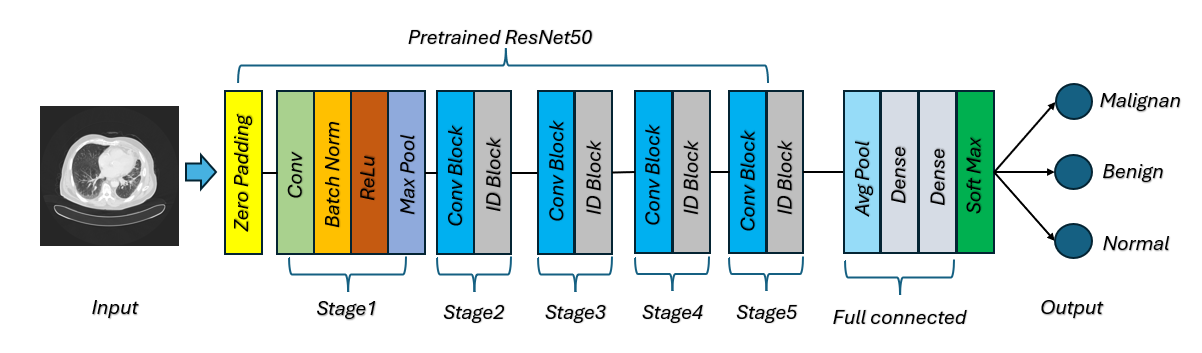
    The function `modelResNet50` defines and compiles a transfer learning model based on the ResNet50 architecture. It customizes the pre-trained ResNet50 by freezing layers and adding new layers for classification.




In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
def modelResNet50(input_shape=(224, 224, 3), num_classes=3):
    Resnet= ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)

    #if you want freeze layers
    for layer in Resnet.layers[:-10]:
        layer.trainable = False

    #if you want un-freeze layers. This example, only the last 6 layers are trained.
    #fine_tune_at = 10
    # Freeze all the layers before the `fine_tune_at` layer
    #for layer in vgg.layers[:fine_tune_at]:
    #    layer.trainable = False

    x = Resnet . output
    x = GlobalAveragePooling2D () ( x )
    x = Dense (1024 , activation = 'relu') ( x )
    x = Dropout (0.5) ( x )
    x = Dense (512 , activation = 'relu') ( x )
    x = Dropout (0.5) ( x )
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=Resnet.input, outputs=output)

    model.summary()

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=1e-5),
        metrics=['accuracy']
        )

    return model
MyTrainResnet50=ImageClassificationModel()
MyTrainResnet50.model_weights ="Resnet.h5"
MyTrainResnet50.CustomModel=modelResNet50
MyTrainResnet50.load_data("DataSet/train","DataSet/val","DataSet/test")

print(f"Data Train: {MyTrain.data_train}")
print(f"Data Val: {MyTrain.data_val}")
print(f"Data Test: {MyTrain.data_test}")

MyTrainResnet50.TrainModel(30)
MyTrainResnet50.evaluate_predictions()
MyTrainResnet50.visualize_predictions( class_labels=("Benign","Malignant","Normal"))
DirToPredict = "/content/DataSet/test"
MyTrainResnet50.predict_images__directories(DirToPredict)

**`modelResNet50` Explaining**
1.  Load Pre-Trained ResNet50

    ```Python
    Resnet = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    ```
    - `input_shape`:  Specifies the shape of input images.
    - `weights='imagenet'`: Loads weights pre-trained on the ImageNet dataset.
    - `include_top=False`: Excludes the top (fully connected) layers of ResNet50, retaining only the convolutional base for feature extraction.

2.  Freezing Layers
    ```Python
    for layer in Resnet.layers[:-10]:
        layer.trainable = False
```
    - **Freezing Layers** : Freezes all layers except the last 10 in ResNet50. Frozen layers do not update during training.
3.  Custom  Full Connected Layers
    ```Python
      x = Resnet.output
      x = GlobalAveragePooling2D()(x)
      x = Dense(1024, activation='relu')(x)
      x = Dropout(0.5)(x)
      x = Dense(512, activation='relu')(x)
      x = Dropout(0.5)(x)
      ```
    - `GlobalAveragePooling2D()`: Replaces the flattened layer with global average pooling, reducing the spatial dimensions while retaining essential features.
    - `Dense(1024, activation='relu')`: Fully connected layer with 1024 neurons and ReLU activation.
    - `Dropout(0.5)`: Regularization to reduce overfitting by randomly deactivating 50% of neurons during training.
    - Second Dense and Dropout Layers : Adds another fully connected layer with 512 neurons, followed by dropout.

4.  Output Layer

    `output = Dense(num_classes, activation='softmax')(x)`
    - `Dense(num_classes)`: Final classification layer with `num_classes` neurons (one for each class).

    - `activation='softmax'`: Converts logits into probabilities for multi-class classification.

5.  Define model

  `model = Model(inputs=Resnet.input, outputs=output)`
    
  Combines the modified ResNet50 base `(Resnet.input)` with the custom layers to create the final model.

6.  Compile the model

    `model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)`

  - `loss='categorical_crossentropy'` : Suitable for multi-class classification tasks.
  - `optimizer=Adam(learning_rate=1e-5)` : Adam optimizer with a low learning rate (1e-5), ideal for fine-tuning pre-trained models.
  - `metrics=['accuracy']`: Tracks accuracy during training.

7.  model.summary

  `model.summary()` : Displays the architecture of the model, including the number of trainable and non-trainable parameters.




- Transfer Learning Using VGG16

  The function `modelVGG16` defines and compiles a transfer learning model based on the VGG16 architecture. It customizes the pre-trained VGG16 by freezing layers and adding new layers for classification.

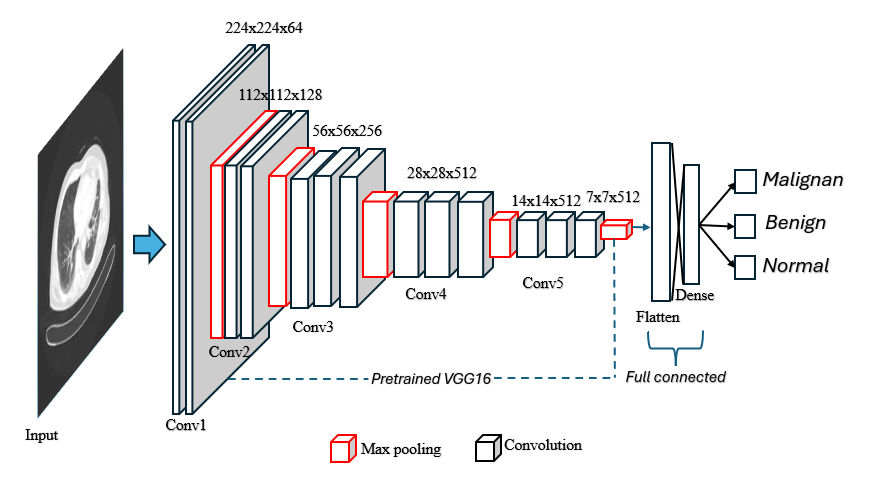

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
def modelVGG16(input_shape=(224, 224, 3), num_classes=3):
    VGG= VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

    #if you want freeze layers
    for layer in VGG.layers:
        layer.trainable = False

    #if you want un-freeze layers. This example, only the last 6 layers are trained.
    #fine_tune_at = 10
    # Freeze all the layers before the `fine_tune_at` layer
    #for layer in VGG.layers[:fine_tune_at]:
    #    layer.trainable = False

    x = Flatten()(VGG.output)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=VGG.input, outputs=output)

    model.summary()

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=1e-5),
        metrics=['accuracy']
        )

    return model

MyTrainVGG16=ImageClassificationModel()
MyTrainVGG16.model_weights ="VGG16.h5"
MyTrainVGG16.CustomModel=modelVGG16
MyTrainVGG16.load_data("DataSet/train","DataSet/val","DataSet/test")

print(f"Data Train: {MyTrain.data_train}")
print(f"Data Val: {MyTrain.data_val}")
print(f"Data Test: {MyTrain.data_test}")

MyTrainVGG16.TrainModel(30)
MyTrainVGG16.evaluate_predictions()
MyTrainVGG16.visualize_predictions( class_labels=("Benign","Malignant","Normal"))
DirToPredict = "/content/DataSet/test"
MyTrainVGG16.predict_images__directories(DirToPredict)

**`modelVGG16` Explaining**
1.  Load Pre-Trained VGG16

    ```Python
    VGG = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)
    ```

    - `input_shape`:  Specifies the shape of input images.
    - `weights='imagenet'`: Loads weights pre-trained on the ImageNet dataset.
    - `include_top=False`: Excludes the top (fully connected) layers of ResNet50, retaining only the convolutional base for feature extraction.

2.  Freezing Layers
    ```Python
    for layer in Resnet.layers:
        layer.trainable = False
```
    - **Freezing Layers** : Prevents all layers of VGG16 from being updated during training. This is useful when the pre-trained features are already sufficient for the task.

3.  Custom  Full Connected Layers
    ```Python
      x = Flatten()(VGG.output)
      x = Dense(256, activation="relu")(x)
      x = Dropout(0.5)(x)
      output = Dense(num_classes, activation='softmax')(x)
      ```
    - `Flatten()`: Flattens the output of the last convolutional layer of VGG16 into a 1D vector.
    - `Dense(256, activation="relu")`: Adds a fully connected layer with 256 neurons and ReLU activation for feature learning.
    - `Dropout(0.5)`: Applies dropout regularization to randomly deactivate 50% of neurons during training, helping to prevent overfitting.

4.  Output Layer

    `output = Dense(num_classes, activation='softmax')(x)`
    - `Dense(num_classes)`: Final classification layer with `num_classes` neurons (one for each class).

    - `activation='softmax'`: Converts logits into probabilities for multi-class classification.

5.  Define model

  `model = Model(inputs=VGG.input, outputs=output)`
    
  Combines the VGG16 base and the custom layers into a single model.

6.  Compile the model

    `model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)`

  - `loss='categorical_crossentropy'` : Suitable for multi-class classification tasks.
  - `optimizer=Adam(learning_rate=1e-5)` : Adam optimizer with a low learning rate (1e-5), ideal for fine-tuning pre-trained models.
  - `metrics=['accuracy']`: Tracks accuracy during training.

7.  model.summary

  `model.summary()` : Displays the architecture of the model, including the number of trainable and non-trainable parameters.

# Activity



1. Please download the CardiomegalyDataset, which is a medical dataset related to the diagnosis of cardiomegaly. The data is sourced from Kaggle and is derived from the processed NIH Chest X-ray Dataset. This dataset is divided into two classes:

   - True: Indicates that the patient truly has cardiomegaly.
   -False: Indicates that the patient does not have cardiomegaly.
   
   You can download the dataset by running the code below.

   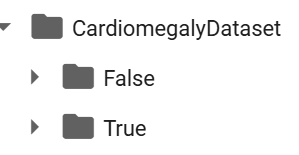

In [ ]:
import zipfile
!pip install gdown
!gdown "https://drive.google.com/uc?id=1RIbzE2XOK2ZIaxKnz2yS06_u9cZrpUVE"
with zipfile . ZipFile ("/content/CardiomegalyDataset.zip",'r') as zip_ref :
  zip_ref . extractall ("/content")

2. Split the dataset
   Please split the dataset into training ,validation, and test sets using the module described earlier.

3. Choose a classification model Select one of the classification models, such as:
  - CNN model
  - ResNet50
  - VGG16
  - Or modify an existing model to create a custom one.
  
  After selecting a model, perform the classification process as outlined in the previous module.